In [1]:
#Create a list of functions
var('x y z t')
f(x,y) = 1-3*sqrt(x^2+y^2)
pr(x,y) = x*y
h(x,y)=x^2-y^2
ap(x,y) = x^2+y^2
g(x,y) = x*sin(x^2-y^2)
w(x,y)=(abs(y*x))^(2/3)

In [108]:
# Methods to plot planes and cross-sections
# N.b. Parametrizing level curves is a bit tricky
def yequalsc(c,xRange=[-3,3],yRange=[-3,3],zRange=[-3,3],color='blue',opacity=1):
    return implicit_plot3d(y==c,(x,xRange[0],xRange[1]),(y,yRange[0],yRange[1]),(z,zRange[0],zRange[1]),axes=False,opacity=opacity)
def ycrossatc(c,f,xRange=[-3,3],color='red'):
    return parametric_plot([t,c,f(t,c)],(t,xRange[0],xRange[1]),color=color,thickness=5)
def xequalsc(c,xRange=[-3,3],yRange=[-3,3],zRange=[-3,3],color='blue',opacity=1):
    return implicit_plot3d(x==c,(x,xRange[0],xRange[1]),(y,yRange[0],yRange[1]),(z,zRange[0],zRange[1]),axes=False,thickness=10,opacity=opacity)
def xcrossatc(c,f,yRange=[-3,3],color='green'):
    return parametric_plot([c,t,f(c,t)],(t,yRange[0],yRange[1]),color=color,thickness=5)
def zequalsc(c,xRange=[-3,3],yRange=[-3,3],zRange=[-3,3],color='blue',opacity=1):
    return implicit_plot3d(z==c,(x,xRange[0],xRange[1]),(y,yRange[0],yRange[1]),(z,zRange[0],zRange[1]),axes=False,thickness=1,opacity=opacity)
def zcrossatc(c,f,yRange=[-3,3],zRange=[-3,3],xRange=[-3,3],color='red',thickness=0.05):
    return implicit_plot3d(f(x,y)-z==0,(x,xRange[0],xRange[1]),(y,yRange[0],yRange[1]),(z,zRange[0],zRange[1]),axes=False,color=color,region=lambda x,y,z : c-thickness<=z and z<=c+thickness,plot_points=400)

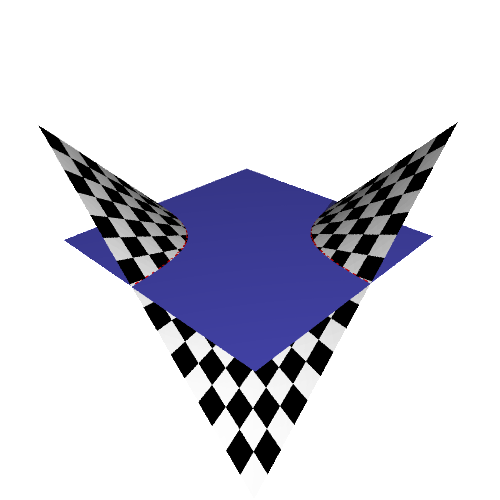

In [111]:
#Test: Plot funtion pr and show level curve
PR = plot3d(pr,(x,-3,3),(y,-3,3),adaptive=True,color=['black','white'])
zc = zequalsc(1)
zcs=zcrossatc(1,pr)
T=PR+zc+zcs
T.show(frame=False,viewer="tachyon")

In [55]:
def graphPlot(f,xRange=[-3,3],yRange=[-3,3],opacity=0.8,color=['black','white']):
    return plot3d(f,(x,xRange[0],xRange[1]),(y,yRange[0],yRange[-1]),adaptive=True,color=color,opacity=opacity)

def showXcrossSection(f,c,xRange=[-3,3],yRange=[-3,3],color=['black','white']):
    Pg=graphPlot(f,xRange=xRange,yRange=yRange,color=color)
    zRange=[Pg.bounding_box()[0][2],Pg.bounding_box()[1][2]]
    Xplane = xequalsc(c,xRange=xRange,yRange=yRange,zRange=zRange)
    Xcross = xcrossatc(c,f,yRange=yRange)
    T = Pg+Xplane+Xcross
    return T
    
def showYcrossSection(f,c,xRange=[-3,3],yRange=[-3,3],color=['black','white']):
    Pg=graphPlot(f,xRange=xRange,yRange=yRange,color=color)
    zRange=[Pg.bounding_box()[0][2],Pg.bounding_box()[1][2]]
    Yplane = yequalsc(c,xRange=xRange,yRange=yRange,zRange=zRange)
    Ycross = ycrossatc(c,f,xRange=xRange)
    T = Pg+Yplane+Ycross
    return T

def showZcrossSection(f,c,xRange=[-3,3],yRange=[-3,3],color=['black','white']):
    Pg=graphPlot(f,xRange=xRange,yRange=yRange,color=color)
    zRange=[Pg.bounding_box()[0][2],Pg.bounding_box()[1][2]]
    Zplane = zequalsc(c,xRange=xRange,yRange=yRange,zRange=zRange)
    Zcross = zcrossatc(c,f,xRange=xRange,yRange=yRange,zRange=zRange)
    T = Pg+Zplane+Zcross
    return T

In [56]:
#Test saving to file
T=showZcrossSection(pr,-1)
T.save("pic.gif",viewer="tachyon",frame=False)

In [112]:
#Animated cross-sections
#These produce sequences of numbered .gif files that can be put together
def animateGraph(f,basename,xRange=[-1,1],yRange=[-1,1],zRange=[-1,1],steps=48,xcross=True,ycross=True,zcross=True,verbose=True,showframe=False,showaxes=False):
    """"Produces 4 sequences of .gifs giving animations 
    rotating a graph and showing cross sections"""
    print "Starting..."
    G=graphPlot(f,xRange=xRange,yRange=yRange)
    xincr = (xRange[1]-xRange[0])/steps
    yincr = (yRange[1]-yRange[0])/steps
    zincr = (zRange[1]-zRange[0])/steps
    xpos=xRange[0]
    ypos=yRange[0]
    zpos=zRange[0]
    frame=0
    while (xpos <= xRange[1]) and xcross:
        outfile = basename+"-xcross-"+"%03d"%frame+".gif"
        xcs=showXcrossSection(f,xpos,xRange=xRange,yRange=yRange)
        xcs.save(outfile,viewer='tachyon',frame=showframe,axes=showaxes,aspect_ratio=1)
        if verbose: print "Produced x="+str(xpos)+"cross-section"
        xpos = xpos+xincr
        frame=frame+1
    frame=0
    while (ypos <= yRange[1]) and ycross:
        outfile = basename+"-ycross-"+"%03d"%frame+".gif"
        ycs=showYcrossSection(f,ypos,xRange=xRange,yRange=yRange)
        ycs.save(outfile,viewer='tachyon',frame=showframe,axes=showaxes,aspect_ratio=1)
        if verbose: print "Produced y="+str(ypos)+"cross-section"
        ypos = ypos+yincr
        frame=frame+1
    frame=0
    while (zpos <= zRange[1]) and zcross:
        outfile = basename+"-zcross-"+"%03d"%frame+".gif"
        zcs=showZcrossSection(f,zpos,xRange=xRange,yRange=yRange)
        zcs.save(outfile,viewer='tachyon',frame=showframe,axes=showaxes,aspect_ratio=1)
        if verbose: print "Produced z="+str(zpos)+"cross-section"
        zpos = zpos+zincr
        frame=frame+1
    print "Finished!"

In [113]:
#Calls a shell script that invokes imagemagick to make an animated gif
#default extensions come from animategraph
import subprocess
def assemble(basename,delay=8,extensions=["-xcross","-ycross","-zcross"]):
    extensions=extensions
    for e in extensions:
        base="{0}{1}".format(basename,e)
        print base
        print "Animating"
        subprocess.check_output(["sh","animategifs.sh",str(delay),base])
        #print "Cleaning up"
        #subprocess.check_output(["sh","cleanup.sh",base])

In [114]:
animateGraph(pr,"xy",zRange=[-1,1],verbose=False)
animateGraph(h,"x2-y2",zRange=[-1,1],verbose=False)
assemble("xy",extensions=[""])
assemble("x2-y2",extensions=[""])

Starting...
Finished!
Starting...
Finished!
xy
Animating
x2-y2
Animating
